# Лабораторна робота №1

Студентки Ярки Ірини, КН-413 <br>
Варіант 3 <br>
Завдання: Виконати box-фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз

In [1]:
from PIL import Image as PILImage, ImageDraw
from IPython.display import Image, display

In [2]:
def get_kernel(height, width):
    return [[1 / (height * width)] * width] * height

In [3]:
def get_offset(kernel):
    return len(kernel) // 2

In [4]:
input_image = PILImage.open("images/sample.jpg")
input_pixels = input_image.load()

In [5]:
kernel = get_kernel(3, 3)
offset = len(kernel) // 2

In [6]:
output_image = PILImage.new("RGB", input_image.size)
draw = ImageDraw.Draw(output_image)

In [7]:
kernel_sizes = [(5, 5), (15, 15), (30, 30)]

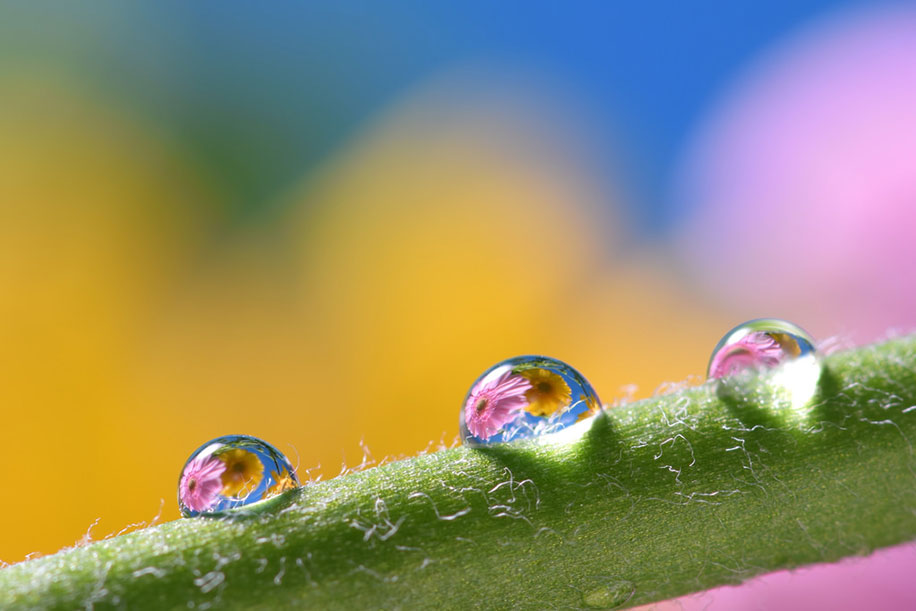

In [8]:
display(Image(filename="images/sample.jpg"))

def compute_pixels(kernel_sizes):
    for size in kernel_sizes:
        kernel = get_kernel(*size)
        offset = len(kernel) // 2
        for x in range(offset, input_image.width - offset):
            for y in range(offset, input_image.height - offset):
                acc = [0, 0, 0]
                for a in range(len(kernel)):
                    for b in range(len(kernel)):
                        xn = x + a - offset
                        yn = y + b - offset
                        pixel = input_pixels[xn, yn]
                        acc[0] += pixel[0] * kernel[a][b]
                        acc[1] += pixel[1] * kernel[a][b]
                        acc[2] += pixel[2] * kernel[a][b]

                draw.point((x, y), (int(acc[0]), int(acc[1]), int(acc[2])))
        output_image.save(f"images/output_{size[0]}_{size[1]}.png")
        display(Image(filename=f"images/output_{size[0]}_{size[1]}.png"))

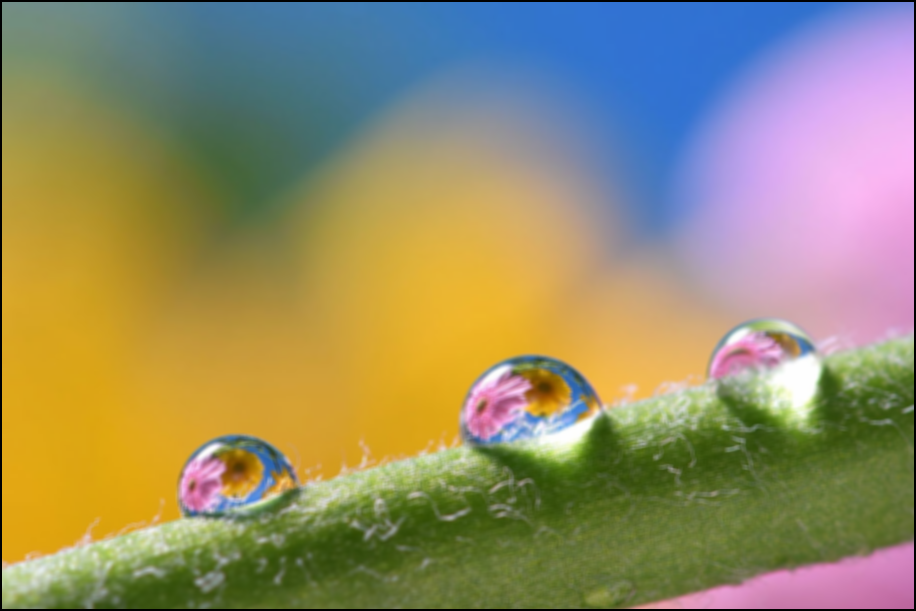

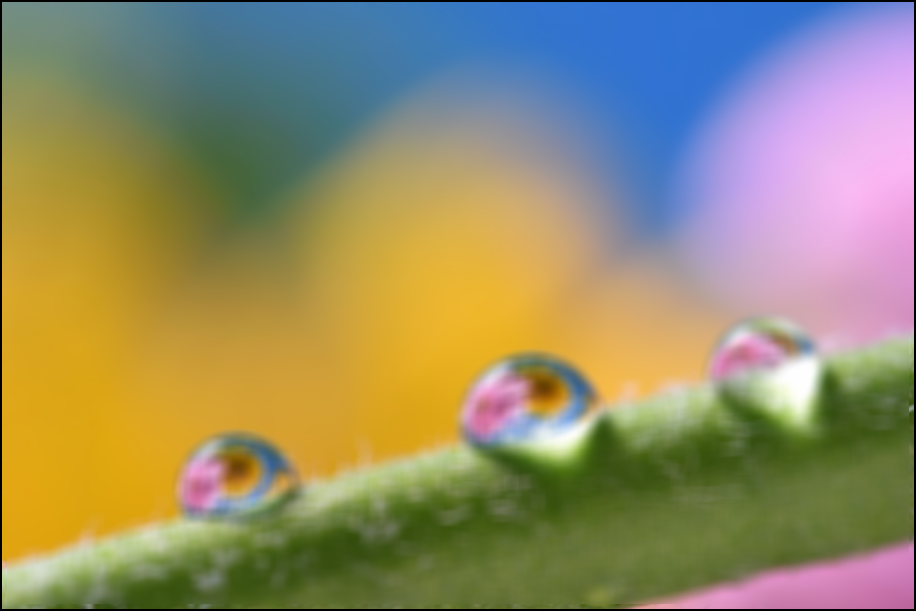

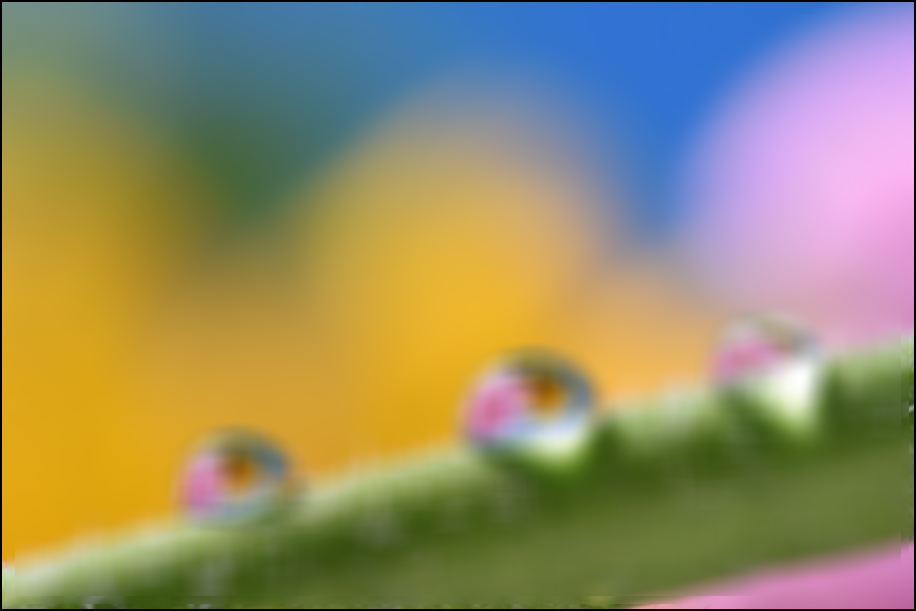

In [9]:
compute_pixels(kernel_sizes)